In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [128]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [129]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [130]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [131]:
# don't train existing weights
for layer in vgg19.layers:
  layer.trainable = False

In [132]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [133]:
folders = glob('Dataset/Train/*')

In [134]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [135]:
x = Flatten()(vgg19.output)

In [136]:
prediction = Dense(len(folders), activation='softmax')(x)

In [137]:
model = Model(inputs=vgg19.input, outputs=prediction)

In [138]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [139]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [141]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [142]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 134 images belonging to 2 classes.


In [143]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Train for 13 steps, validate for 5 steps
Epoch 1/20
13/13 [==============================] - 18s 1s/step - loss: 1.3990 - accuracy: 0.4952 - val_loss: 0.7621 - val_accuracy: 0.5448
Epoch 2/20
13/13 [==============================] - 17s 1s/step - loss: 0.5669 - accuracy: 0.7236 - val_loss: 0.5642 - val_accuracy: 0.7090
Epoch 3/20
13/13 [==============================] - 17s 1s/step - loss: 0.4520 - accuracy: 0.7644 - val_loss: 0.6141 - val_accuracy: 0.6716
Epoch 4/20
13/13 [==============================] - 17s 1s/step - loss: 0.3529 - accuracy: 0.8510 - val_loss: 0.4262 - val_accuracy: 0.7985
Epoch 5/20
13/13 [==============================] - 17s 1s/step - loss: 0.3324 - accuracy: 0.8678 - val_loss: 0.4083 - val_accuracy: 0.8060
Epoch 6/20
13/13 [==============================] - 17s 1s/step - loss: 0.2940 - accuracy: 0.8918 - val_loss: 0.4460 - val_accuracy: 0.8060
Epoch 7/20
13/13 [==============================] - 17s 1s/step - loss: 0.2575 - accuracy: 0.9087 - val_loss: 0.3964 - 

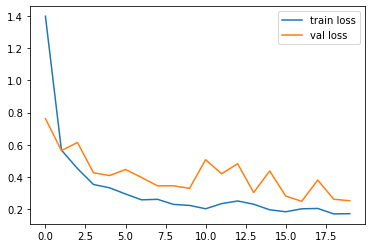

<Figure size 432x288 with 0 Axes>

In [144]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

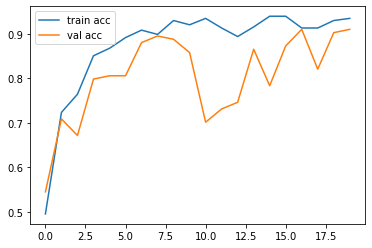

<Figure size 432x288 with 0 Axes>

In [145]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [146]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [147]:
y_pred = model.predict(test_set)

In [148]:
print(y_pred.shape)

(134, 2)


In [149]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [150]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_vgg19.h5')

In [4]:
#Uninfected
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))
#Parasite
img1=image.load_img('Dataset/Test/Parasite/5.png',target_size=(224,224))

In [5]:
x=image.img_to_array(img1)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
x.shape

(224, 224, 3)

In [10]:
x=np.expand_dims(x,axis=0)

In [11]:
x=x/255

In [12]:
x.shape

(1, 224, 224, 3)

In [13]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [14]:
a=np.argmax(model.predict(img_data), axis=1)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_2/block1_conv1/Conv2D (defined at C:\Users\sudee\anaconda3\envs\gputest\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_1417]

Function call stack:
distributed_function


In [ ]:
a.shape

In [ ]:
if(a[0]==1):
    print("Uninfected")
else:
    print("Infected")